In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import cudf as pd

In [3]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
train.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,8,2007,WD,Normal,307000
7,8,60,RL,<NA>,10382,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,1,2008,WD,Normal,118000


In [5]:
train.tail(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1430,1431,60,RL,60.0,21930,Pave,<NA>,IR3,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,7,2006,WD,Normal,192140
1431,1432,120,RL,<NA>,4928,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,10,2009,WD,Normal,143750
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,8,2007,WD,Normal,64500
1433,1434,60,RL,93.0,10261,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,5,2008,WD,Normal,186500
1434,1435,20,RL,80.0,17400,Pave,<NA>,Reg,Low,AllPub,...,0,<NA>,<NA>,<NA>,0,5,2006,WD,Normal,160000
1435,1436,20,RL,80.0,8400,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,GdPrv,<NA>,0,7,2008,COD,Abnorml,174000
1436,1437,20,RL,60.0,9000,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,GdWo,<NA>,0,5,2007,WD,Normal,120500
1437,1438,20,RL,96.0,12444,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,11,2008,New,Partial,394617
1438,1439,20,RM,90.0,7407,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,MnPrv,<NA>,0,4,2010,WD,Normal,149700
1439,1440,60,RL,80.0,11584,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,11,2007,WD,Normal,197000


In [6]:
train.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   

In [7]:
train_test = pd.concat([train, test], axis = 0, ignore_index=True)

In [8]:
train_test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             2919 non-null   int64
 1   MSSubClass     2919 non-null   int64
 2   MSZoning       2915 non-null   object
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64
 5   Street         2919 non-null   object
 6   Alley          198 non-null    object
 7   LotShape       2919 non-null   object
 8   LandContour    2919 non-null   object
 9   Utilities      2917 non-null   object
 10  LotConfig      2919 non-null   object
 11  LandSlope      2919 non-null   object
 12  Neighborhood   2919 non-null   object
 13  Condition1     2919 non-null   object
 14  Condition2     2919 non-null   object
 15  BldgType       2919 non-null   object
 16  HouseStyle     2919 non-null   object
 17  OverallQual    2919 non-null   int64
 18  OverallCond    2919 non-null   

Removing Columns that are either irrelevant or have too many NULL values

In [9]:
train_test=train_test.drop(["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis=1)
train=train.drop(["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis=1)
test=test.drop(["Id", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis=1)

In [10]:
numeric_cols = train.select_dtypes(include = [np.number])
corr = numeric_cols.to_pandas().corr()
print ('The Most Correlated Features with SalePrice:'), print (corr['SalePrice'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with SalePrice:'), print (corr['SalePrice'].sort_values(ascending = False)[-15:])

The Most Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

The Most Uncorrelated Features with SalePrice:
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


(None, None)

Removing all negetively correlated columns

In [11]:
train_test=train_test.drop(["BsmtFinSF2", "BsmtHalfBath", "MiscVal", "LowQualFinSF","YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"],axis=1)

In [12]:
train=train.drop(["BsmtFinSF2", "BsmtHalfBath", "MiscVal", "LowQualFinSF","YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"],axis=1)
test=test.drop(["BsmtFinSF2", "BsmtHalfBath", "MiscVal", "LowQualFinSF","YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"],axis=1)

In [13]:
train_test["Utilities"].describe()

count       2917
unique         3
top       AllPub
freq        2916
Name: Utilities, dtype: object

Removing Utilities because all the values in that column are either same or NULL

In [14]:
train_test=train_test.drop(["Utilities"],axis=1)
train=train.drop(["Utilities"],axis=1)
test=test.drop(["Utilities"],axis=1)

In [15]:
train_test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       2915 non-null   object
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64
 3   Street         2919 non-null   object
 4   LotShape       2919 non-null   object
 5   LandContour    2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  OverallQual    2919 non-null   int64
 14  YearBuilt      2919 non-null   int64
 15  YearRemodAdd   2919 non-null   int64
 16  RoofStyle      2919 non-null   object
 17  RoofMatl       2919 non-null   object
 18  Exterior1st    2918 non-null   

Removing Slightly positively correlated columns

In [16]:
train_test=train_test.drop(["PoolArea", "MoSold", "3SsnPorch"],axis=1)
train=train.drop(["PoolArea", "MoSold", "3SsnPorch"],axis=1)
test=test.drop(["PoolArea", "MoSold", "3SsnPorch"],axis=1)

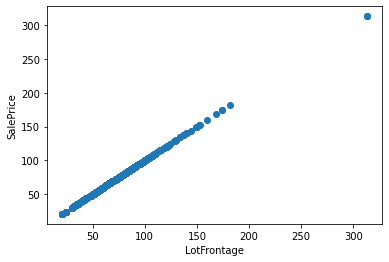

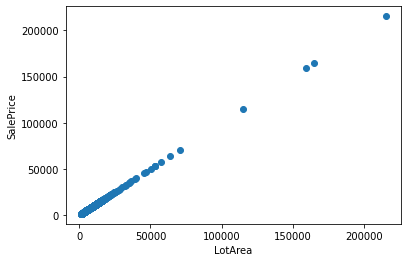

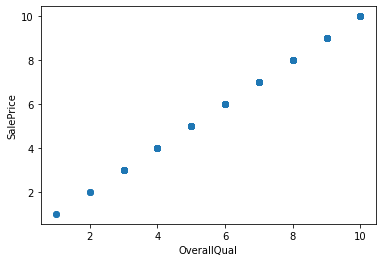

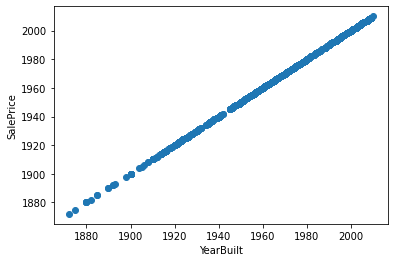

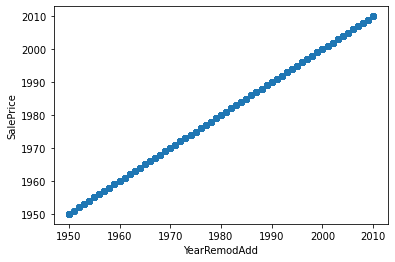

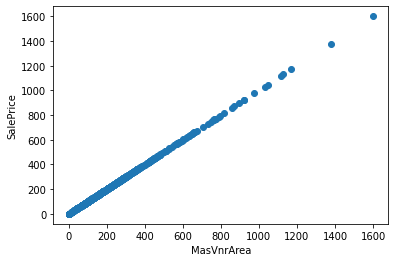

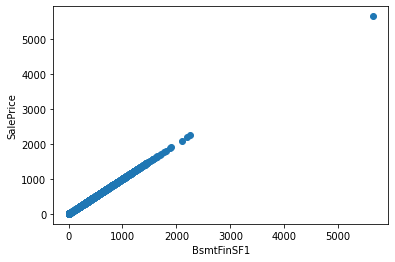

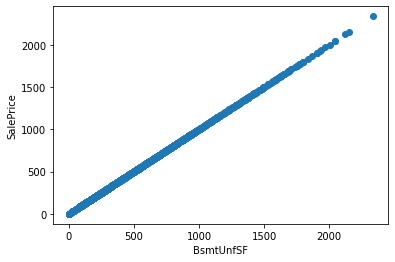

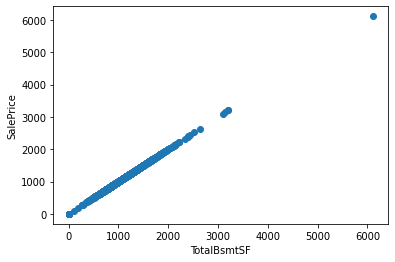

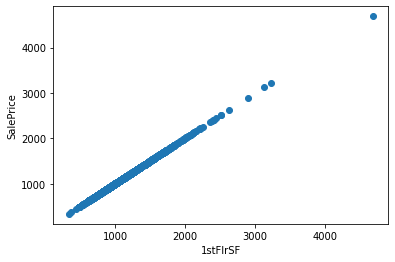

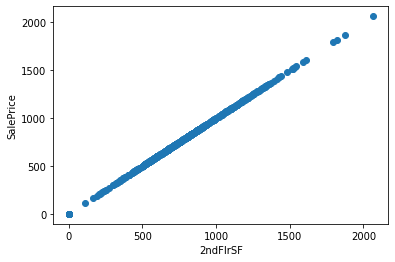

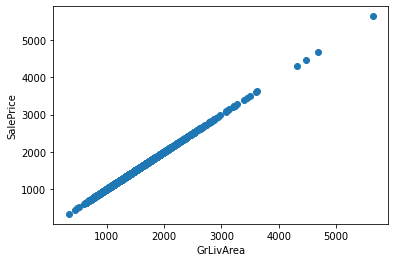

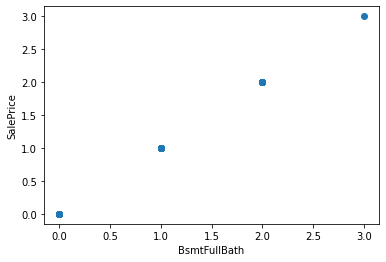

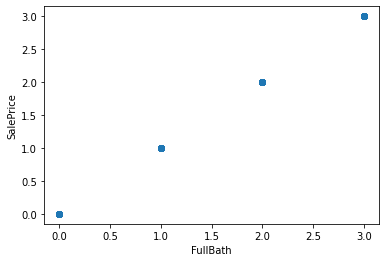

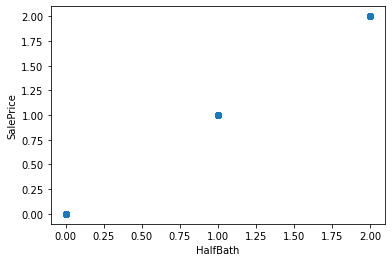

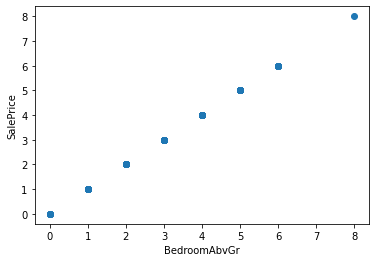

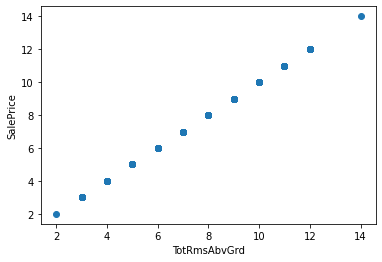

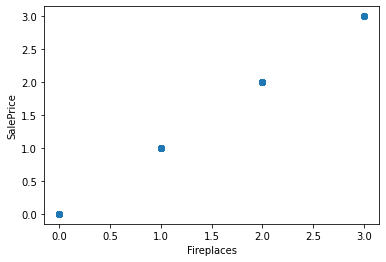

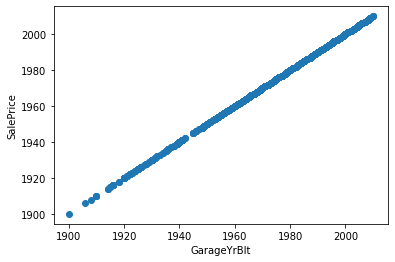

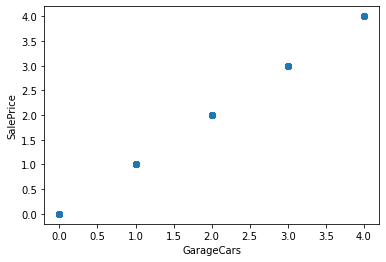

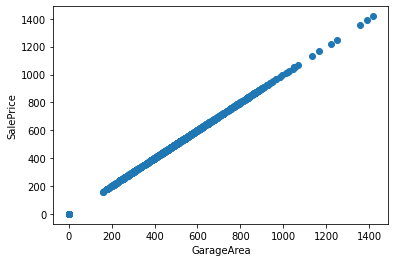

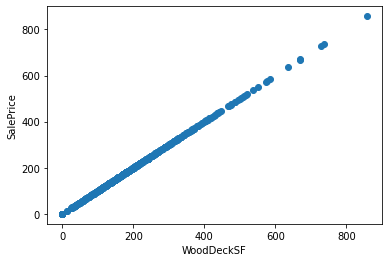

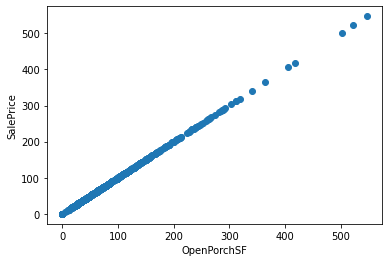

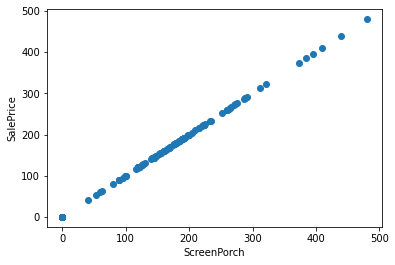

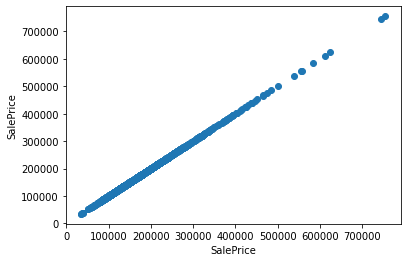

In [17]:
for j in train.columns:
    if train.dtypes[j] ==  train.dtypes['Street']:
        pass
    else:
        plt.scatter(x = train[j].to_array(), y = train[j].to_array())
        plt.ylabel('SalePrice')
        plt.xlabel(j)
        plt.show()

Removing Outliers

In [18]:
lis=[{'col':'LotFrontage','val':200},{'col':'MasVnrArea','val':1200},
     {'col':'BsmtFinSF1','val':3000},{'col':'TotalBsmtSF','val':4000},
     {'col':'1stFlrSF','val':2500},{'col':'GrLivArea','val':4000},
     {'col':'GarageArea','val':1200},{'col':'WoodDeckSF','val':600},
     {'col':'OpenPorchSF','val':400}, {'col': 'LotArea', 'val': 100000}]

for j in lis:
    train= train[train[j['col']] < j['val']]

In [19]:
train

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,548,TA,TA,Y,0,61,0,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,460,TA,TA,Y,298,0,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,608,TA,TA,Y,0,42,0,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,642,TA,TA,Y,0,35,0,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,836,TA,TA,Y,192,84,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,62.0,7500,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,400,TA,TA,Y,0,113,0,WD,Normal,185000
1455,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,460,TA,TA,Y,0,40,0,WD,Normal,175000
1456,RL,85.0,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,500,TA,TA,Y,349,0,0,WD,Normal,210000
1457,RL,66.0,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,252,TA,TA,Y,0,60,0,WD,Normal,266500


In [20]:
train_test["LotFrontage"].isna().sum()

486

Filling NULL values of columns that need mean to be filled in them

In [21]:
mean_cols = ['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

for col in mean_cols:
    train_test[col].fillna(value = train_test[col].mean(), inplace = True)
    test[col].fillna(value = test[col].mean(), inplace = True)
    train[col].fillna(value = train[col].mean(), inplace = True)

Filling NULL values of columns that need mode to be filled in them


In [22]:
mode_cols = ['MSZoning','Exterior1st','Exterior2nd','BsmtQual','BsmtCond',
          'BsmtExposure','BsmtFinType1','Electrical','BsmtFullBath',
           'KitchenQual','Functional','GarageType','GarageYrBlt','GarageFinish'
           ,'GarageQual','GarageCond','SaleType']

for col in mode_cols:
    train_test[col].fillna(value = train_test[col].mode()[0], inplace = True)
    test[col].fillna(value = test[col].mode()[0], inplace = True)
    train[col].fillna(value = train[col].mode()[0], inplace = True)

Filling NULL values of columns that need specific values and median to be filled in them

In [23]:
train_test["MasVnrType"].fillna(value = "Not_Available", inplace = True)
test["MasVnrType"].fillna(value = "Not_Available", inplace = True)
train["MasVnrType"].fillna(value = "Not_Available", inplace = True)

train_test["GarageCars"].fillna(value = train["GarageCars"].median(), inplace = True)
test["GarageCars"].fillna(value = train["GarageCars"].median(), inplace = True)
train["GarageCars"].fillna(value = train["GarageCars"].median(), inplace = True)

In [24]:
train_test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       2919 non-null   object
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64
 3   Street         2919 non-null   object
 4   LotShape       2919 non-null   object
 5   LandContour    2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  OverallQual    2919 non-null   int64
 14  YearBuilt      2919 non-null   int64
 15  YearRemodAdd   2919 non-null   int64
 16  RoofStyle      2919 non-null   object
 17  RoofMatl       2919 non-null   object
 18  Exterior1st    2919 non-null   

In [25]:
train_test["MasVnrArea"].fillna(value = train_test["MasVnrArea"].mean(), inplace = True)
test["MasVnrArea"].fillna(value = test["MasVnrArea"].mean(), inplace = True)
train["MasVnrArea"].fillna(value = train["MasVnrArea"].mean(), inplace = True)

In [26]:
train_test["BsmtFinType2"].fillna(value = train_test["BsmtFinType2"].mode()[0], inplace = True)
test["BsmtFinType2"].fillna(value = test["BsmtFinType2"].mode()[0], inplace = True)
train["BsmtFinType2"].fillna(value = train["BsmtFinType2"].mode()[0], inplace = True)

In [27]:
train_test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       2919 non-null   object
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64
 3   Street         2919 non-null   object
 4   LotShape       2919 non-null   object
 5   LandContour    2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  OverallQual    2919 non-null   int64
 14  YearBuilt      2919 non-null   int64
 15  YearRemodAdd   2919 non-null   int64
 16  RoofStyle      2919 non-null   object
 17  RoofMatl       2919 non-null   object
 18  Exterior1st    2919 non-null   

In [28]:
test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1459 non-null   object
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64
 3   Street         1459 non-null   object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  OverallQual    1459 non-null   int64
 14  YearBuilt      1459 non-null   int64
 15  YearRemodAdd   1459 non-null   int64
 16  RoofStyle      1459 non-null   object
 17  RoofMatl       1459 non-null   object
 18  Exterior1st    1459 non-null   

In [29]:
train.info()

<class 'cudf.core.dataframe.DataFrame'>
Int64Index: 1174 entries, 0 to 1458
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1174 non-null   object
 1   LotFrontage    1174 non-null   float64
 2   LotArea        1174 non-null   int64
 3   Street         1174 non-null   object
 4   LotShape       1174 non-null   object
 5   LandContour    1174 non-null   object
 6   LotConfig      1174 non-null   object
 7   LandSlope      1174 non-null   object
 8   Neighborhood   1174 non-null   object
 9   Condition1     1174 non-null   object
 10  Condition2     1174 non-null   object
 11  BldgType       1174 non-null   object
 12  HouseStyle     1174 non-null   object
 13  OverallQual    1174 non-null   int64
 14  YearBuilt      1174 non-null   int64
 15  YearRemodAdd   1174 non-null   int64
 16  RoofStyle      1174 non-null   object
 17  RoofMatl       1174 non-null   object
 18  Exterior1st    1174 non-null   

In [30]:
# train['Street'].describe()
train['MSZoning'].describe()

count     1174
unique       5
top         RL
freq       904
Name: MSZoning, dtype: object

In [31]:
max_same_val = ["Street", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "LandContour", "LandSlope", "RoofMatl", "ExterCond", "BsmtCond", "BsmtFinType2", "Heating", "CentralAir", "Electrical", "Functional", "SaleCondition", "MSZoning", "LotConfig", "BldgType", "Condition2", "RoofStyle"]


In [32]:
train_test=train_test.drop(max_same_val,axis=1)
train=train.drop(max_same_val,axis=1)
test=test.drop(max_same_val,axis=1)

In [33]:
train_test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotFrontage   2919 non-null   float64
 1   LotArea       2919 non-null   int64
 2   LotShape      2919 non-null   object
 3   Neighborhood  2919 non-null   object
 4   Condition1    2919 non-null   object
 5   HouseStyle    2919 non-null   object
 6   OverallQual   2919 non-null   int64
 7   YearBuilt     2919 non-null   int64
 8   YearRemodAdd  2919 non-null   int64
 9   Exterior1st   2919 non-null   object
 10  Exterior2nd   2919 non-null   object
 11  MasVnrType    2919 non-null   object
 12  MasVnrArea    2919 non-null   float64
 13  ExterQual     2919 non-null   object
 14  Foundation    2919 non-null   object
 15  BsmtQual      2919 non-null   object
 16  BsmtExposure  2919 non-null   object
 17  BsmtFinType1  2919 non-null   object
 18  BsmtFinSF1    2919 non-null   float64
 19  BsmtUnf

In [34]:
test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotFrontage   1459 non-null   float64
 1   LotArea       1459 non-null   int64
 2   LotShape      1459 non-null   object
 3   Neighborhood  1459 non-null   object
 4   Condition1    1459 non-null   object
 5   HouseStyle    1459 non-null   object
 6   OverallQual   1459 non-null   int64
 7   YearBuilt     1459 non-null   int64
 8   YearRemodAdd  1459 non-null   int64
 9   Exterior1st   1459 non-null   object
 10  Exterior2nd   1459 non-null   object
 11  MasVnrType    1459 non-null   object
 12  MasVnrArea    1459 non-null   float64
 13  ExterQual     1459 non-null   object
 14  Foundation    1459 non-null   object
 15  BsmtQual      1459 non-null   object
 16  BsmtExposure  1459 non-null   object
 17  BsmtFinType1  1459 non-null   object
 18  BsmtFinSF1    1459 non-null   float64
 19  BsmtUnf

In [35]:
from cuml import preprocessing

In [36]:
num_cols = train._get_numeric_data().columns
cols=train.columns
categorical = list(set(cols) - set(num_cols))

In [37]:
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'SalePrice'],
      dtype='object')

In [38]:
categorical

['Condition1',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'KitchenQual',
 'Exterior1st',
 'HeatingQC',
 'GarageFinish',
 'HouseStyle',
 'LotShape',
 'GarageType',
 'Exterior2nd',
 'Neighborhood',
 'MasVnrType',
 'BsmtFinType1',
 'ExterQual']

In [39]:
le = preprocessing.LabelEncoder()
for category in categorical:
    train[category] = le.fit_transform(train[category])
    test[category] = le.fit_transform(test[category])

In [40]:
X = train.iloc[:, :-1]
Y = train.iloc[:, -1]
Y = Y.astype("float64")

In [41]:
from cuml.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

In [44]:
from cuml import LinearRegression
import cuml

In [45]:
algo = ['svd', 'eig', 'qr', 'svd-qr', 'svd-jacobi']

for item in algo:    
    lr = LinearRegression(fit_intercept = True, normalize = False,algorithm = item)
    reg = lr.fit(X_train,Y_train)
    preds = lr.predict(X_test)
    print(item)
    print("Mean Sq Err: " + str(cuml.metrics.regression.mean_squared_error(Y_test,preds)))
    print("R2 Score: "+str(cuml.metrics.regression.r2_score(Y_test,preds)))
    print("Mean Abs Err: "+ str(cuml.metrics.regression.mean_absolute_error(Y_test,preds)))

svd
Mean Sq Err: 503778542.0261382
R2 Score: 0.9040945684177062
Mean Abs Err: 17351.12254584902
eig
Mean Sq Err: 503778542.02615356
R2 Score: 0.9040945684177033
Mean Abs Err: 17351.122545849517
qr
Mean Sq Err: 503778542.0261382
R2 Score: 0.9040945684177062
Mean Abs Err: 17351.122545849015
svd-qr
Mean Sq Err: 5405442758.490295
R2 Score: -0.02904605377078351
Mean Abs Err: 56108.914435437924
svd-jacobi
Mean Sq Err: 5405442758.4902935
R2 Score: -0.029046053770783287
Mean Abs Err: 56108.9144354379


**Predictions on Test Data**

In [46]:
test = sc.transform(test)

In [47]:
lr = LinearRegression(fit_intercept = True, normalize = False,algorithm = 'eig')
reg = lr.fit(X_scaled,Y)
preds = lr.predict(test)
print(preds)

0       121703.895185
1       169092.372343
2       185865.046221
3       184599.123814
4       200209.522346
            ...      
1454     64118.729843
1455     79397.681203
1456    193854.145203
1457    124176.638997
1458    229582.460806
Length: 1459, dtype: float64


In [48]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

final_df=pd.DataFrame(test['Id'],columns=['Id'])
final_df['SalePrice']=preds
filename='./submission.csv'
final_df.to_csv(filename,index=False)